In [2]:
# Read in the data from csv, view, and attach
help_data <- read.csv("/home/elkip/Documents/BU/BS800/Data/helplinreg.csv", header=TRUE)
head(help_data)
attach(help_data)

,age,female,Drinks.per.Day,idnum
,<int>,<int>,<int>,<int>
1,37,0,13,1
2,37,0,56,2
3,26,0,0,3
4,39,1,5,4
5,32,0,10,5
6,47,1,4,6


The following objects are masked from help_data (pos = 3):

    age, Drinks.per.Day, female, idnum




In [7]:
# Observe the Drinks.per.day variable
print("Distribution summary of drinks:")
summary(Drinks.per.Day)
print(paste("Number of NA values in drinks: ", sum(is.na(Drinks.per.Day))))
print(paste("Number of subjects with 0 drinks per day", sum(Drinks.per.Day == 0)))

[1] "Distribution summary of drinks:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    3.00   13.00   18.42   26.00  142.00 

[1] "Number of NA values in drinks:  0"
[1] "Number of people with 0 drinks per day 67"


In [8]:
# Observe the Drinks.per.day variable
print("Distribution summary of age:")
summary(age)
print(paste("Number of NA values in age: ", sum(is.na(age))))

[1] "Distribution summary of age:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   35.00   35.77   41.00   60.00 

[1] "Number of NA values in age:  0"



Call:
lm(formula = Drinks.per.Day ~ age)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.290 -14.003  -5.536   9.508 113.243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1379     4.3099   0.032    0.974    
age           0.5111     0.1177   4.341 1.74e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.79 on 463 degrees of freedom
Multiple R-squared:  0.03911,	Adjusted R-squared:  0.03704 
F-statistic: 18.85 on 1 and 463 DF,  p-value: 1.741e-05


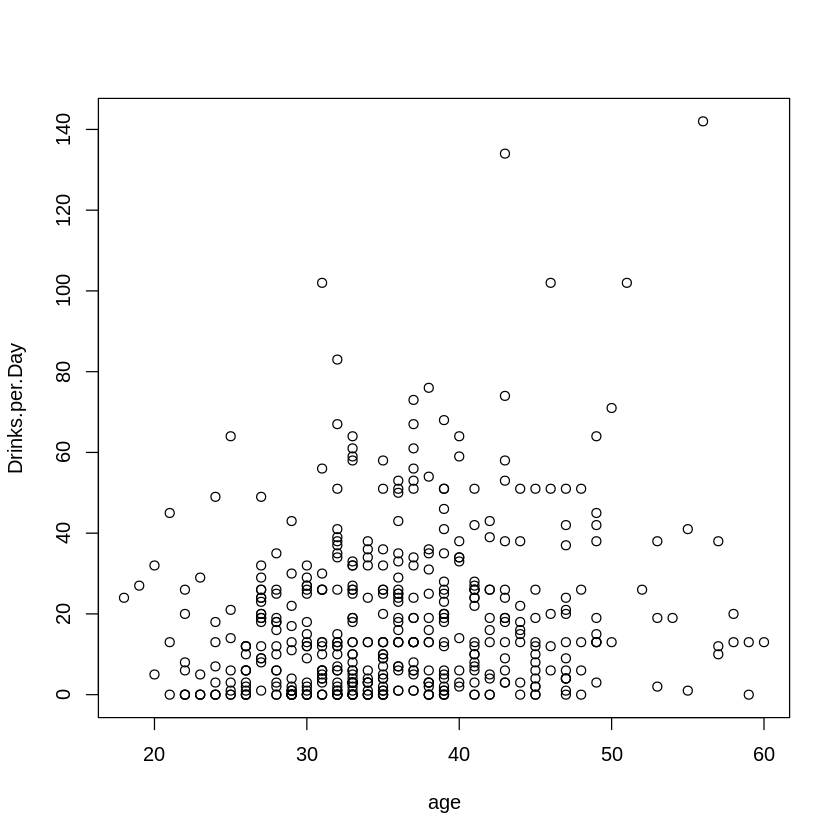

In [9]:
# Fit linear regression model
plot(x=age, y=Drinks.per.Day)
reg <- lm(Drinks.per.Day ~ age)
summary(reg)

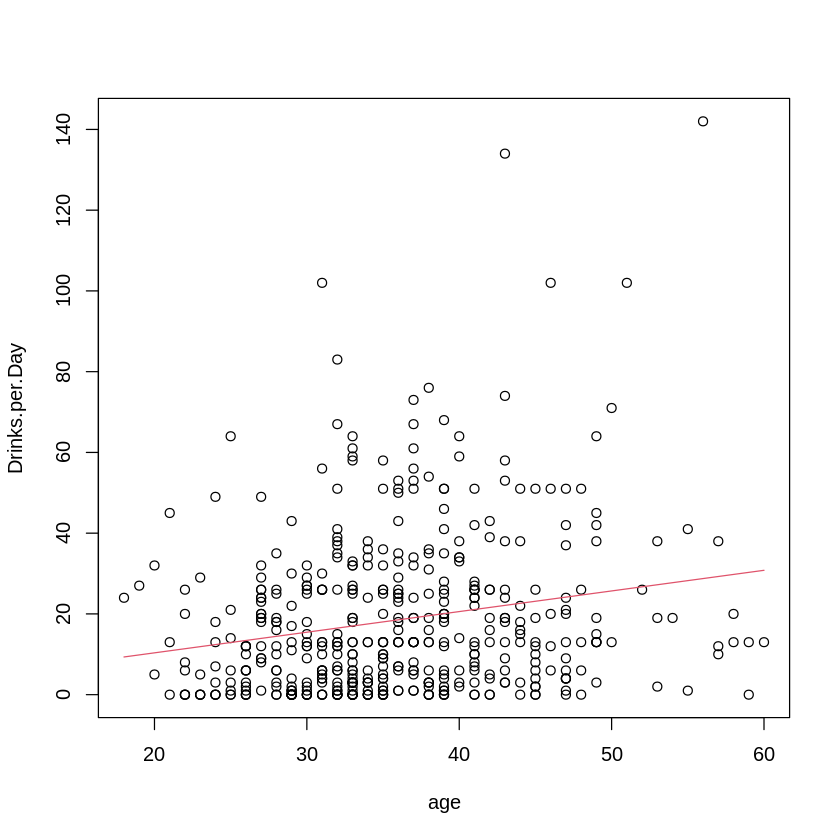

In [10]:
# Fit the line to the scatter plot
plot(x=age, y=Drinks.per.Day)
lines(x = age,y = reg$fitted.values, col=2)

In [14]:
# Predicted drinks at age 50
print(reg$coefficients[1] + reg$coefficients[2]*50)

(Intercept) 
   25.69061 


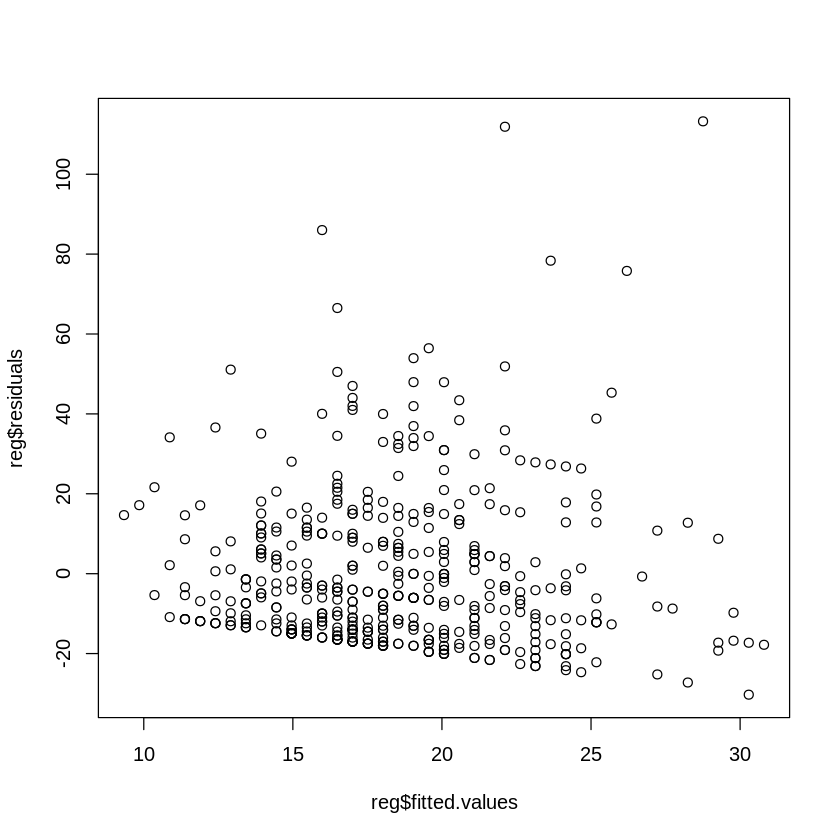

In [15]:
# Residual Plot
plot(x=reg$fitted.values, y=reg$residuals)

In [16]:
# Take log of Drinks.per.day variable
lg_drinks <- log(Drinks.per.Day + 1)
summary(lg_drinks)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.386   2.639   2.322   3.296   4.963 

In [23]:
# Linear regression of lg_drinks on age
lg_reg <- lm(lg_drinks~age)
summary(lg_reg)


Call:
lm(formula = lg_drinks ~ age)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1191 -0.8747  0.2751  1.0528  2.4767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.094047   0.278383   3.930 9.79e-05 ***
age         0.034322   0.007604   4.514 8.08e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.279 on 463 degrees of freedom
Multiple R-squared:  0.04215,	Adjusted R-squared:  0.04008 
F-statistic: 20.38 on 1 and 463 DF,  p-value: 8.08e-06


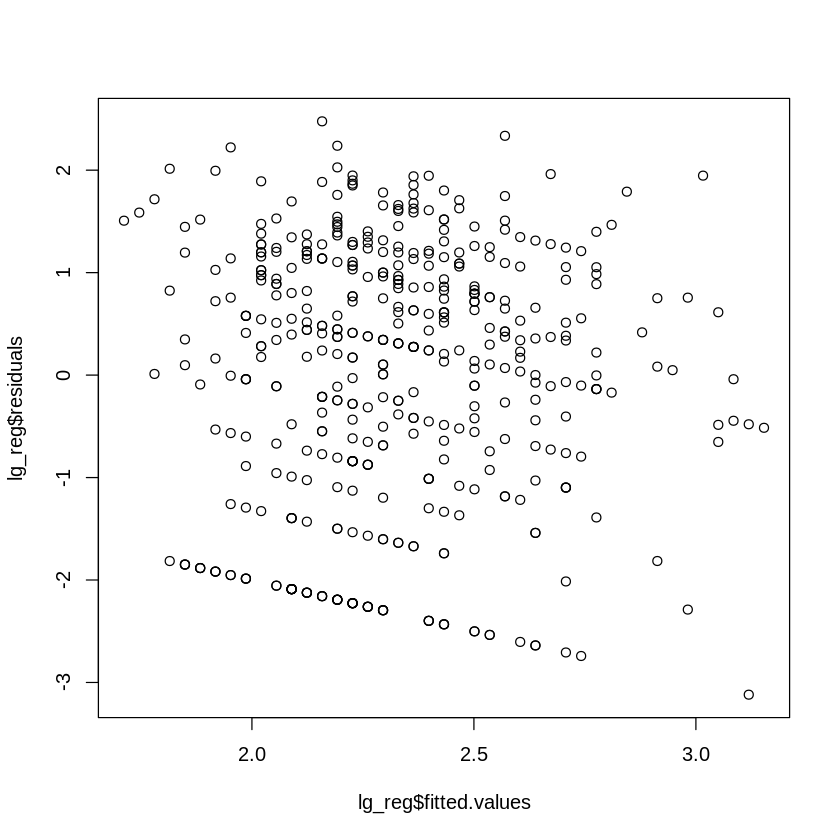

In [25]:
# Residual Plot
plot(x=lg_reg$fitted.values, y=lg_reg$residuals)

In [28]:
# Predicted drinks when age == 50
exp(lg_reg$coefficients[1] + lg_reg$coefficients[2]*50)-1

(Intercept) 
   15.61265

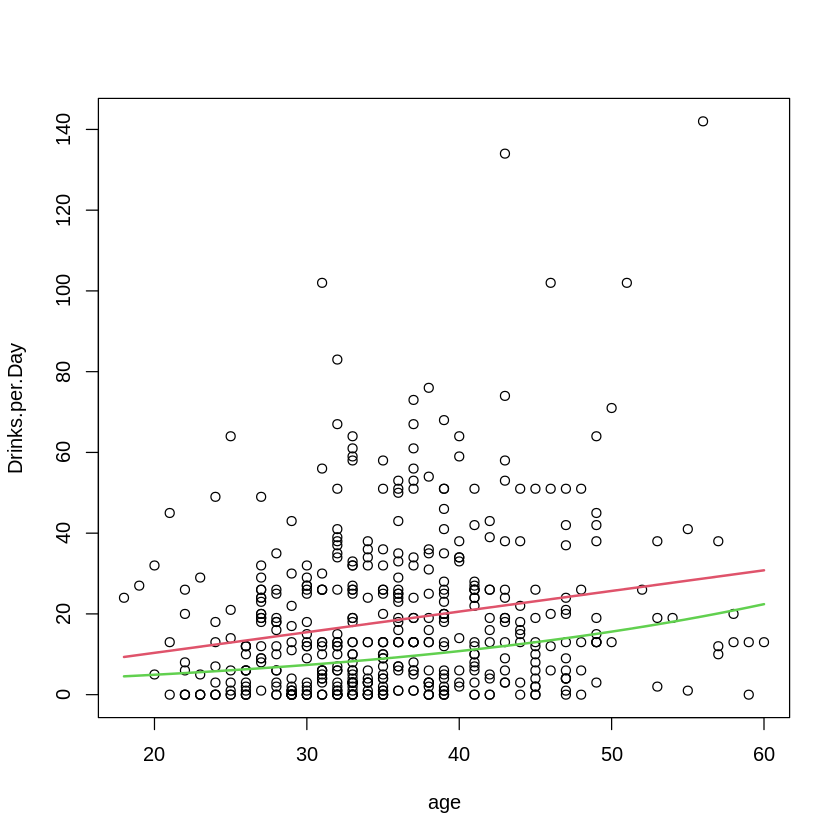

In [29]:
# Scatterplot of predicted drinks from both models
plot(x=age, y=Drinks.per.Day)
lines(x=sort(age), y=sort(reg$fitted.values), col=2, lwd=2)
lines(x=sort(age), y=sort((exp(lg_reg$fitted.values)-1)), col=3, lwd=2)